<IPython.core.display.Javascript object>


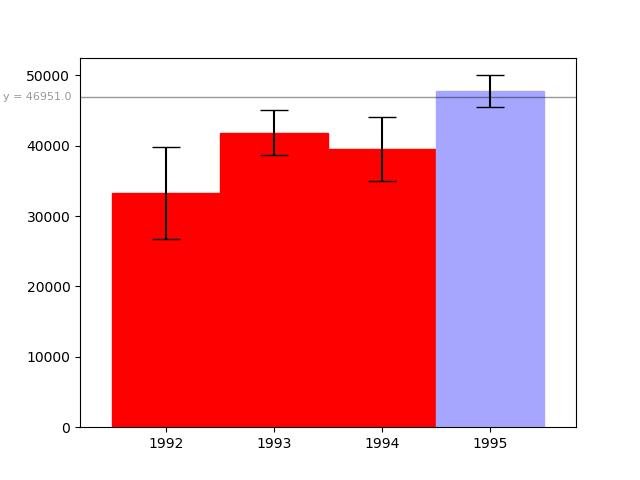

7

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from matplotlib import cm
import pandas as pd
import numpy as np

np.random.seed(12345)
confidence = 0.95

def zerotoone(x):
    if x > 1:
        x_new = 1
    elif x < 0:
        x_new = 0
    else:
        x_new = x
    return x_new

def plot_colour(df, y_value):
    x = np.arange(len(df['mean']))
    bars = plt.bar(x, df['mean'], width=1)
    plt.xticks(x, df.index) 
    (_, caps, _) = plt.errorbar(x, df['mean'], yerr=df['ci'], 
                                fmt='.', markersize=0, capsize=10, color='black')
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.plot([-1 , 4], [y_value, y_value], 'k-', lw=1, alpha=0.4)
    df['colnum'] = df.apply(lambda x: (y_value-x['bottom'])/(x['top']-x['bottom']), axis=1)
    df['colnum'] = df['colnum'].map(zerotoone)
    colours = cm.bwr(df['colnum'])

    for year in np.arange(len(df.index)):
        bars[year].set_color(colours[year])
    axes = plt.gca()
    axes.text(-1.2, y_value - 500,
              'y = ' +str(np.round(y_value,0)) ,
              ha='center', color='black', alpha=0.4, fontsize=8)
    axes.set_xlim([-0.8,3.8])

def onclick(event):
    plt.cla()
    plot_colour(summary, event.ydata)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])    


summary = pd.DataFrame(columns=['count', 'mean', 'sd', 'sem', 'ci'])
summary['count'] = df.count(axis=1)
summary['mean'] = df.mean(axis=1)
summary['sd'] = df.std(axis=1)
summary['sem'] = scipy.stats.sem(df, axis=1)
summary['ci'] = summary.apply(lambda x: x['sem'] * sp.stats.t._ppf((1+confidence)/2., x['count']-1), axis=1)
summary['top'] = summary['mean'] + summary['ci']
summary['bottom'] = summary['mean'] - summary['ci']

plt.figure()
y_value = 42000
plot_colour(summary, y_value)
plt.gcf().canvas.mpl_connect('button_press_event', onclick)